In [91]:
from scvi.priors.gaussianprior import GaussianPrior
from scvi.priors.mixofgausprior import MixOfGausPrior
from scvi.priors.vampprior import VampPrior
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import Normal
import torch

In [92]:
def plotDistr(dist, lim, n = 30):
    ax = plt.figure().add_subplot(projection='3d')
    xs = []; ys = []; lps = []
    for i in range(n):
        for j in range(n):
            x = i * (2*lim) / n - lim
            y = j * (2*lim) / n - lim
            lp = dist.log_prob(torch.tensor([x,y])).detach()
            lps.append(lp)
            xs.append(x)
            ys.append(y)
    ax.scatter(xs, ys, zs= lps)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('log_prob')
    ax.legend()
    ax.view_init(elev=20., azim=-35, roll=0)
    plt.title("Density distribution")
    plt.show()

In [93]:
snp = Normal(torch.zeros(2), torch.ones(2))
gp = GaussianPrior(2,torch.tensor([1.0,1.0]),torch.tensor([0.0,-0.5]))
means = torch.tensor([[10.0,10.0],[-10.0,-10.0],[-10.0,10.0]])
logvar = torch.tensor([[0.5,0.5],[0.5,0.5],[0.5,0.5]])
mgp = MixOfGausPrior(2,3,torch.zeros(3),means,logvar)

type: GaussianPrior.__init__() takes 2 positional arguments but 4 were given

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


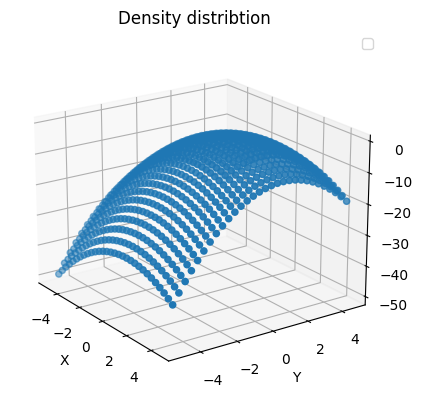

In [ ]:
plotDistr(gp, 5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


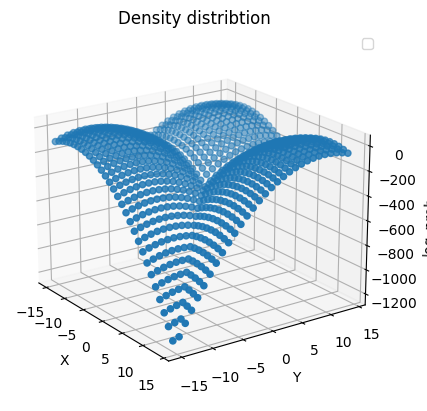

In [90]:
plotDistr(mgp, 15)

In [86]:
def plotSamples(distr, num, title, numsamples = True):
    x = []; y = []
    for i in range(num):
        if numsamples:
            s = distr.sample(1)
            x.append(s[0,0])
            y.append(s[0,1])
        else:
            s = distr.sample()
            x.append(s[0])
            y.append(s[1])
    plt.scatter(x,y)
    plt.title(title)      

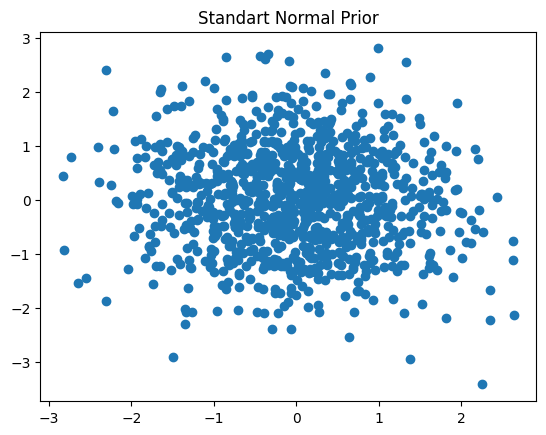

In [87]:
plotSamples(snp, 1000, "Standart Normal Prior", False)

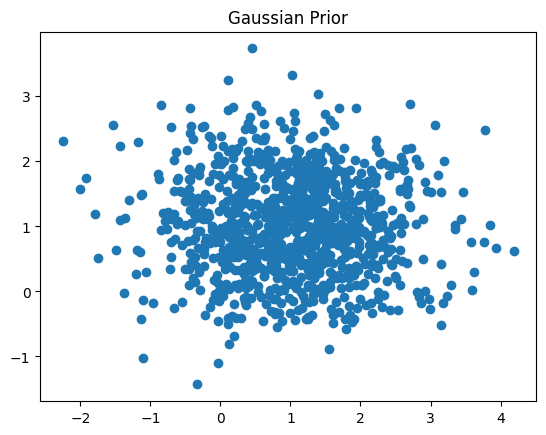

In [88]:
plotSamples(gp, 1000, "Gaussian Prior")

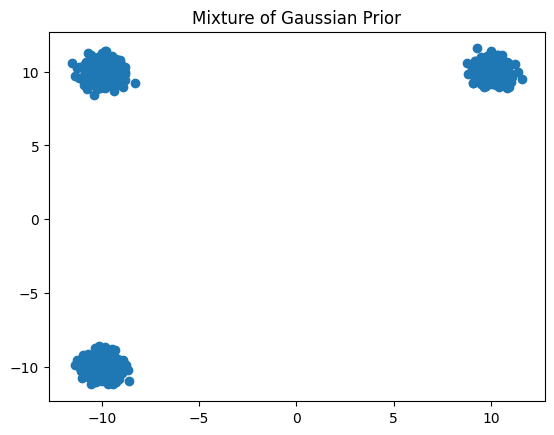

In [89]:
plotSamples(mgp, 1000, "Mixture of Gaussian Prior")